## 1D Convolution

Before entering the domain of images, let's understand convolution in a simpler context, working with signals of just 1 dimension.

Remembering: Convolution is the sum of the product between functions, one of which is **inverted and shifted**. The **1D** Convolution indicates that this function will be shifted in only one dimension.
  
---

Let's assume the following problem:<br>
You have decided to collect data from a cell phone's accelerometer. The objective is to make people walk with their cell phone in their pocket to analyze how the sensor responds to this movement. As demonstrated [in this work](https://www.researchgate.net/publication/221296054_Impact_of_different_walking_surfaces_on_gait_identification_based_on_higher-order_statistics_of_accelerometer_data/figures?lo=1), the magnitude in the accelerometer signal changes like a kind of **noisy sinusoid**.


Next we will simulate similar data and assume that **we want to find the increasing intervals in this signal.**

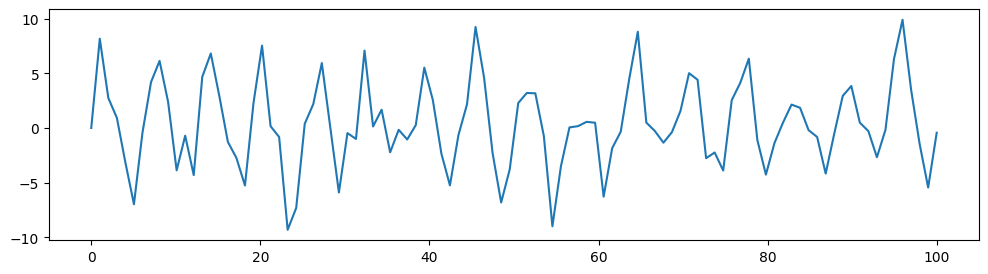

In [12]:
# Importing libraries and graph plotting

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

x = np.linspace(0, 100, 100)
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12, 3))
plt.plot(x, sin)

To make things easier, the following cell presents a function that uses matplotlib to print the 1D signals as a vector of values.

In [13]:
# Defining the 'show' function that receives two parameters: 'values' and 'title'

def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

### 1D representation

We will use a small section of the signal to illustrate the effect of convolution.

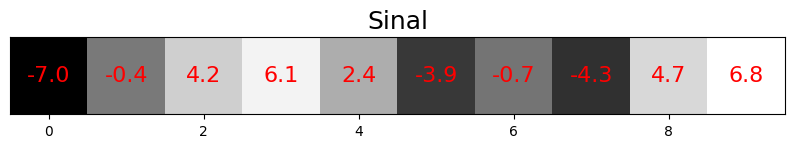

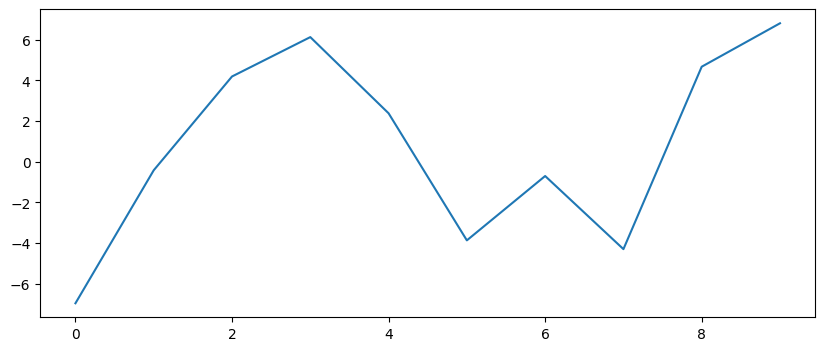

In [14]:
# Display the selected part as an image, configure and plot the graph.

sinal = sin[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(10, 4))
plt.plot(sinal)

### Kernel

In the context of image processing, the kernel is a **convolutional filter**. In practical terms, it is an n-dimensional matrix that will be operated on the data through a convolution.

It can be said that convolution **measures the similarity** between the two signals.

We therefore need to propose a kernel that simulates the pattern we are looking for: increasing intervals.
> But remember that convolution operates the functions after **inverting the kernel**.

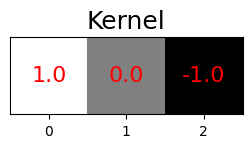

In [4]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

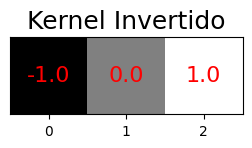

In [5]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

In the following cell we will print the kernel **moving it along the sign** to understand the operation step by step.

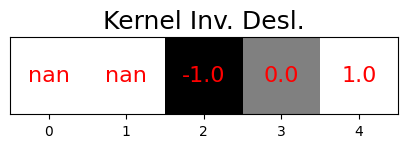

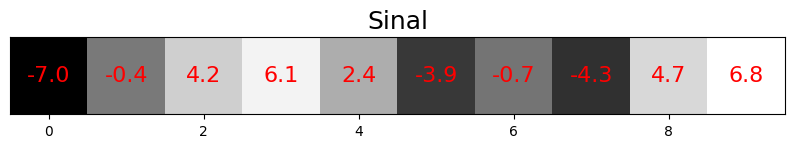

In [17]:
# Let's change the value of u and shift the kernel

plt.close('all')
u=2
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

Now let's compare our calculations with the result of the ```convolve``` function from the ```scipy``` library.

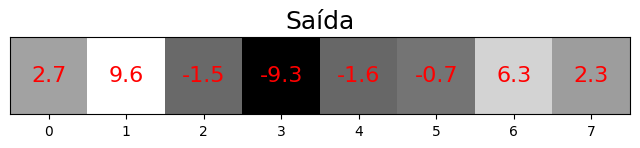

In [7]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')

To make it more visual, let's print the resulting function superimposed on the original signal, in order to better understand how this function helps us identify the increasing intervals of the original signal.

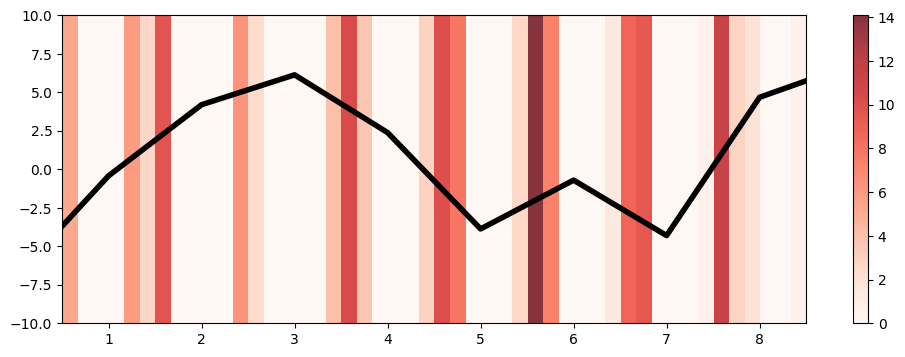

In [18]:
# plots the signal on a graph, displaying a color image of the output data and adds a color bar

plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

What if we run it through the rest of the signal as a sort of classification?<br>
In this specific context, we can consider that **activations less than zero** indicate that there is no increasing trend in that signal interval.

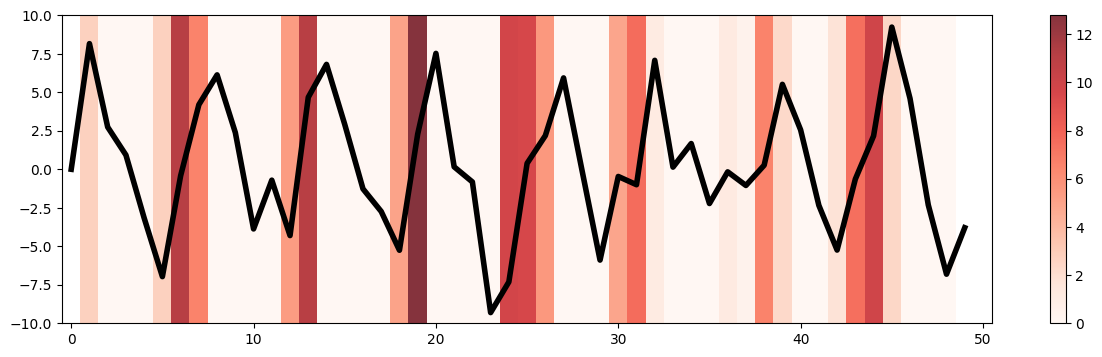

In [19]:
# convolution on signal, resets negative values, plots signal and convolution image on a graph

out = convolve(sin[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()